# \[ IPD447 \] Tarea \#2: Reconstrucción de Imágenes

**Integrantes:**
- Juan Aguilera     201621028-8
- Mauricio Aravena  201503001-4



## 1. Codificación Poblacional:

In [44]:
# Required dependencies
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson

# Caso 1: Gaussianas uniformemente distribuidas
###  a) Grafique las curvas de selectividad de las 20 neuronas en un solo gráfico.

Se distribuye de forma uniforme el intervalo [-10,10] los centros $\mu_{i}$ de las Gaussianas (media) generando el vector `u_vector`

In [50]:
u_vector = np.linspace(-10,10,20) # centro/media de la gaussiana
print(u_vector)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


Se procede a graficar cada una de las Gaussianas, considerando para cada una varianza unitaria ($\sigma_{i} = 1$) y una amplitud de 10. De esta forma la expresión para cada Gaussiana es de la forma:

$$ f_{i}(x) = 10 \cdot e^{\frac{(x-\mu)^{2}}{2}} $$

Dado que se está utilizando la función de distribución normal provista por la biblioteca `scipy`, es necesario utilizar una factor de normalización sobre la expresión para asegurar una amplitud de 10, este factor, denotado en el código como `gaussian_normalization`, tiene un valor de $\sqrt{2\cdot \pi}$.

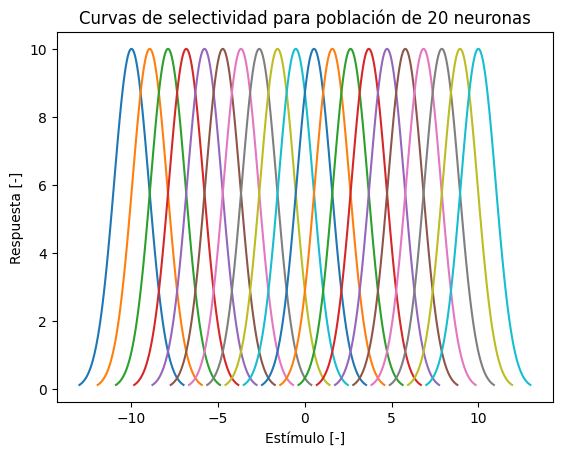

In [53]:
g_vector = np.empty(20, dtype=object) 
i = 0
for u in u_vector:
    mu = u
    variance = 1
    sigma = math.sqrt(variance)
    x_plot = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    gaussian_normalization = math.sqrt(2*np.pi)
    g_vector[i] =  10 * gaussian_normalization * stats.norm.pdf(x_plot, mu, sigma)
    plt.xlabel('Estímulo [-]')
    plt.ylabel('Respuesta [-]')
    plt.title('Curvas de selectividad para población de 20 neuronas')
    plt.plot(x_plot, g_vector[i])
    i += 1  
plt.show()

El gráfico representa la respuesta de la población de neuronas frente a estímulos distribuidos en el vector [-10,10]. Los máximos de la respuesta de la población se alinean con las medias $\mu_{i}$ asociada a la curva de selectividad de cada neurona integrante de la población, esto indica que existen entradas *predilectas* para cada miembro de la población. Note que para estas entradas predilectas, dentro del intervalo de estímulo seleccionado, existirá una mayor tasa de disparo en promedio. 

### b) Sea x una variable aleatoria que distribuye uniformemente en el intervalo [−5, 5].

In [54]:
x_vector = np.random.uniform(-5,5,10)
print(x_vector)

[ 2.19315033  4.54821199  1.47585766  1.04255016 -3.12645273  2.16516697
 -4.74593604 -0.04237673 -2.3227189  -3.92025639]


In [55]:
f = {} 
for x in x_vector: # para cada variablea aleatoria x
    response = np.empty(len(u_vector), dtype=int) 
    i = 0
    for u in u_vector: # calcular la respuesta de cada neurona ( segun su curva de selectividad gausiana que depende de su media u)
        response[i] = np.random.poisson(lam=10*math.exp(-(x-u)**2/2), size=1) # obs: falta agregar el tiempo, por ahora esta como t=  1segundo en lambda = fi(s)*t 
        i += 1
    f[x] = response

In [49]:
for x in x_vector:
    print(f[x]) # f[x] implica la cantidad de spikes en cada neurona dada la entrada x
    

[ 0  0  0  0  0  0  0  0  0  1  9 13  4  2  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 2 2 7 5 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 4 9 9 1 0 0 0 0]
[0 0 0 0 0 4 4 7 1 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  3 12  7  2  0  0  0  0  0  0]
[0 0 0 0 0 3 8 9 5 1 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  1  5  7 13  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  3 10  8  2  1  0  0  0  0]
[ 0  0  0  0  0  0  3  3 14  2  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  3 11  7  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
